<a href="https://colab.research.google.com/github/ShohamWeiss/Machine-Vision-Project/blob/master/DataPreparation/Capturing_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo{}.png', quality=0.8):
  js = Javascript('''
    function sleep(ms) {
      return new Promise(resolve => setTimeout(resolve, ms));
    }

    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      const numberCaptured = document.createElement('p');
      var num = 0;
      capture.textContent = 'Capture';
      numberCaptured.textContent = num;

      navigator.mediaDevices.enumerateDevices()
      .then(function(devices) {
        devices.forEach(function(device) {
          console.log(device.kind + ": " + device.label +
                      " id = " + device.deviceId);
        });
      })

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({ video: { deviceId: { exact: "01efb66b8e16471a810cd7d30bb7f00fd9ac10c10227a2e4909a1a397ac15665" } } });

      document.body.appendChild(div);
      div.appendChild(video);
      div.appendChild(capture);
      div.appendChild(numberCaptured);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      
      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);
      
      var images = [];
      while (num < 10)
      {
        console.log(num);
        numberCaptured.textContent = num;
        num++;
        await sleep(200);
        const canvas = document.createElement('canvas');
        canvas.width = video.videoHeight;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        images.push(canvas.toDataURL('image/png', quality));
      }
      
      stream.getVideoTracks()[0].stop();
      div.remove();
      return images;
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  files = []
  for i in range(len(data)):
    binary = b64decode(data[i].split(',')[1])
    file = filename.format(i)
    with open("drive/MyDrive/Colab Notebook/HandGestureRecognition/images/" + file, 'wb') as f:
      f.write(binary)
    files.append(file)
  return files

<IPython.core.display.Javascript object>

saved to:  ['photo0.png', 'photo1.png', 'photo2.png', 'photo3.png', 'photo4.png', 'photo5.png', 'photo6.png', 'photo7.png', 'photo8.png', 'photo9.png']


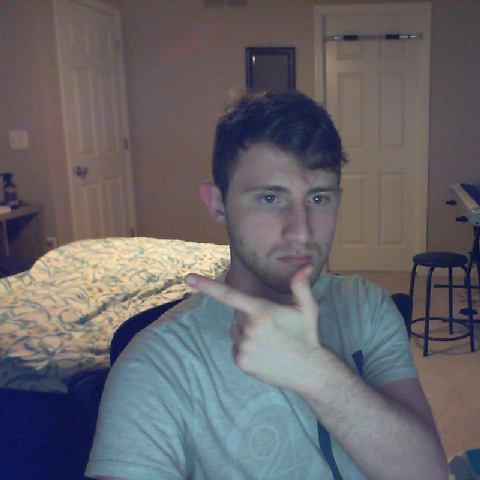

In [15]:
from IPython.display import Image
try:
  files = take_photo()
  print('saved to: ', files)
  # Show the image which was just taken.
  display(Image(files[0]))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

# resize

In [10]:
import PIL

In [11]:
photo = PIL.Image.open('photo.jpg')

FileNotFoundError: ignored

In [ ]:
photo.size

In [ ]:
photo = photo.crop(box=(0,0,480,480))

In [12]:
photo

NameError: ignored

In [ ]:
def canvasclick():
  js = Javascript('''
    function getClickPosition(e) {
    var xPosition = e.clientX;
    var yPosition = e.clientY;
    console.log(xPosition, yPosition);
    } 
    async function canvasclick() {
      const div = document.createElement('div');
      const canvas = document.createElement('canvas');
      canvas.style.backgroundImage = "url('photo0.png')";
      canvas.addEventListener("click", getClickPosition, false);
      div.appendChild(canvas);
      document.body.appendChild(div);
      
      return;
    }
    ''')
  display(js)
  data = eval_js('canvasclick()')
  return

In [ ]:
canvasclick()

<IPython.core.display.Javascript object>

In [ ]:
!ls

photo0.jpg  photo2.jpg	photo4.jpg  photo6.jpg	photo8.jpg  sample_data
photo0.png  photo2.png	photo4.png  photo6.png	photo8.png
photo1.jpg  photo3.jpg	photo5.jpg  photo7.jpg	photo9.jpg
photo1.png  photo3.png	photo5.png  photo7.png	photo9.png


In [ ]:
%%html
<img src='photo0.jpg' />

In [ ]:
blob:https://colab.research.google.com/84057c85-7964-4e9d-8046-437bc598a999